In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp  "/content/drive/My Drive/Academics/CS/AML/Project/Data/Train_1_gram_prep.csv" .
!cp  "/content/drive/My Drive/Academics/CS/AML/Project/Data/Validate_1_gram_prep.csv" .
!cp  "/content/drive/My Drive/Academics/CS/AML/Project/Data/Train_2_gram_prep.csv" .
!cp  "/content/drive/My Drive/Academics/CS/AML/Project/Data/Validate_2_gram_prep.csv" .
!cp  "/content/drive/My Drive/Academics/CS/AML/Project/Data/Train_3_gram_prep.csv" .
!cp  "/content/drive/My Drive/Academics/CS/AML/Project/Data/Validate_3_gram_prep.csv" .

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
train_data_1 = pd.read_csv("Train_1_gram_prep.csv")
validate_data_1 = pd.read_csv("Validate_1_gram_prep.csv")
X_train_1 = train_data_1.iloc[::,:-1].values
y_train_1 = train_data_1["Label"].values
X_validate_1 = validate_data_1.iloc[::,:-1].values
y_validate_1 = validate_data_1["Label"].values


## Gradient Boost Classifier

### Tuning parameters on n_estimators and min_sample_split

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline
def Xgboost_parameter(X_train, y_train, X_validate, y_validate):
  n_estimator = [500, 800, 1000, 1500, 2000, 3000, 5000, 8000]
  min_sample_split = [8]
  plt.figure(dpi = 400)
  for i in min_sample_split:
    validate_f1 = []
    for j in n_estimator:
      GBC = GradientBoostingClassifier(n_estimators = j, min_samples_split = i)
      GBC.fit(X_train,y_train.ravel())
      pred = GBC.predict(X_validate)
      f1_score1 = f1_score(y_validate.ravel(), pred.ravel(), average='weighted')
      print("min_sample_split = %s, n_estimator = %s, validation F1-score = %s"%(i,j,f1_score1))
      validate_f1.append(f1_score1)
    plt.plot(np.array(n_estimator),np.array(validate_f1), label = "min_sample_split = %s"%(i))
  plt.title("XGboost validation performance with different estimators and minimal sample split")
  plt.legend()
  plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
def best_validate_performance(best_model,X_train, y_train, X_validate, y_validate):
  best_model.fit(X_train,y_train.ravel())
  pred = best_model.predict(X_validate)
  f1 = f1_score(y_validate.ravel(), pred.ravel(), average='weighted')
  precision = precision_score(y_validate.ravel(), pred.ravel(), average='weighted')
  recall = recall_score(y_validate.ravel(), pred.ravel(), average='weighted')
  accuracy = accuracy_score(y_validate.ravel(), pred.ravel())
  probas_ = best_model.predict_proba(X_validate)
  fpr, tpr, thresholds = roc_curve(y_validate, probas_[:, 1])
  roc_auc = auc(fpr, tpr)
  print("Precision: %s"%(precision))
  print("Recall: %s"%(recall))
  print("Accuracy: %s"%(accuracy))
  print("F1-score: %s"%(f1))

  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC for Xgboost classifier')
  plt.legend(loc="lower right")
  plt.show()

## 1-gram model

In [ ]:

Xgboost_parameter(X_train_1, y_train_1, X_validate_1, y_validate_1)

min_sample_split = 8, n_estimator = 500, validation F1-score = 0.8969350121700916
min_sample_split = 8, n_estimator = 800, validation F1-score = 0.9008500988562911
min_sample_split = 8, n_estimator = 1000, validation F1-score = 0.9026846265969514
min_sample_split = 8, n_estimator = 1500, validation F1-score = 0.9061052786448336
min_sample_split = 8, n_estimator = 2000, validation F1-score = 0.9065778247708908


In [ ]:
model= GradientBoostingClassifier(n_estimators = 8000, min_samples_split = 2).fit(X_train_1,y_train_1.ravel())
pred = model.predict(X_validate_1)
f1 = f1_score(y_validate_1.ravel(), pred.ravel(), average='weighted')
print(f1)


0.9100776696155348


In [ ]:
model= GradientBoostingClassifier(n_estimators = 3000, min_samples_split = 8).fit(X_train_1,y_train_1.ravel())
pred = model.predict(X_validate_1)
f1 = f1_score(y_validate_1.ravel(), pred.ravel(), average='weighted')
print(f1)


KeyboardInterrupt: ignored

In [ ]:
 col_2 = [0.8979165831327371,0.9015872728424897,0.9031745022486501,0.9062336452013547,0.9060955602464259,0.9087740230356025,0.9104728379488686,0.9100776696155348]
col_5 = [0.8979155737459761,0.9020793823278677,0.9018280256895425,0.9056196695668223,0.9075600040337942,0.9087699584211891,0.9109647454326658,0.9092122968251268]
col_8 = [0.8969350121700916,0.9008500988562911，0.9026846265969514，0.9061052786448336， 0.9065778247708908]

### Train the best-tuned Xgboost Classifier and report the validate 
* F-1 score
* precision
* recall
* accuracy
* ROC

Precision: 0.9128318325656545
Recall: 0.9097642266386866
Accuracy: 0.9097642266386866
F1-score: 0.9101046546329381


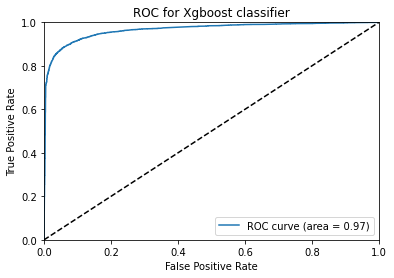

In [ ]:

best_GBC = GradientBoostingClassifier(n_estimators = 5000, min_samples_split = 5)

best_validate_performance(best_GBC,X_train_1, y_train_1, X_validate_1, y_validate_1)

### AUC, area under ROC curve shows how accurate the classifier is performing, and according to our best tuned Xgboost Classifier, it attains an AUC of 0.96, which is outstanding.

## 2-Gram Model

In [ ]:
train_data_2 = pd.read_csv("Train_2_gram_prep.csv")
validate_data_2 = pd.read_csv("Validate_2_gram_prep.csv")
X_train_2 = train_data_2.iloc[::,:-1].values
y_train_2 = train_data_2["Label"].values
X_validate_2 = validate_data_2.iloc[::,:-1].values
y_validate_2 = validate_data_2["Label"].values
#parametr tuning
Xgboost_parameter(X_train_2, y_train_2, X_validate_2, y_validate_2)

Precision: 0.90374844912248
Recall: 0.8954450067892853
Accuracy: 0.8954450067892853
F1-score: 0.8959519918926956


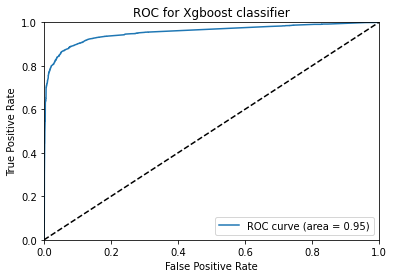

In [ ]:
best_GBC = GradientBoostingClassifier(n_estimators = 500, min_samples_split =5 )
best_validate_performance(best_GBC,X_train_2, y_train_2, X_validate_2, y_validate_2)

## 3-Gram Model

In [ ]:
del X_train_2
del X_validate_2
del y_train_2
del y_validate_2
del X_train_1
del X_validate_1
del y_train_1
del y_validate_1

In [ ]:
del train_data_1
del validate_data_1
del train_data_2
del validate_data_2

min_sample_split = 2, n_estimator = 100, validation F1-score = 0.8763610478101059
min_sample_split = 2, n_estimator = 150, validation F1-score = 0.8819232004160608
min_sample_split = 2, n_estimator = 200, validation F1-score = 0.8853782672379831
min_sample_split = 2, n_estimator = 300, validation F1-score = 0.8898115727909894
min_sample_split = 2, n_estimator = 500, validation F1-score = 0.8960749758253543
min_sample_split = 5, n_estimator = 100, validation F1-score = 0.8762388323178344
min_sample_split = 5, n_estimator = 150, validation F1-score = 0.8818007820350878
min_sample_split = 5, n_estimator = 200, validation F1-score = 0.8855008199943916
min_sample_split = 5, n_estimator = 300, validation F1-score = 0.8910399833507332
min_sample_split = 5, n_estimator = 500, validation F1-score = 0.8954614225022146
min_sample_split = 8, n_estimator = 100, validation F1-score = 0.8767317911678426
min_sample_split = 8, n_estimator = 150, validation F1-score = 0.8819232004160608
min_sample_split

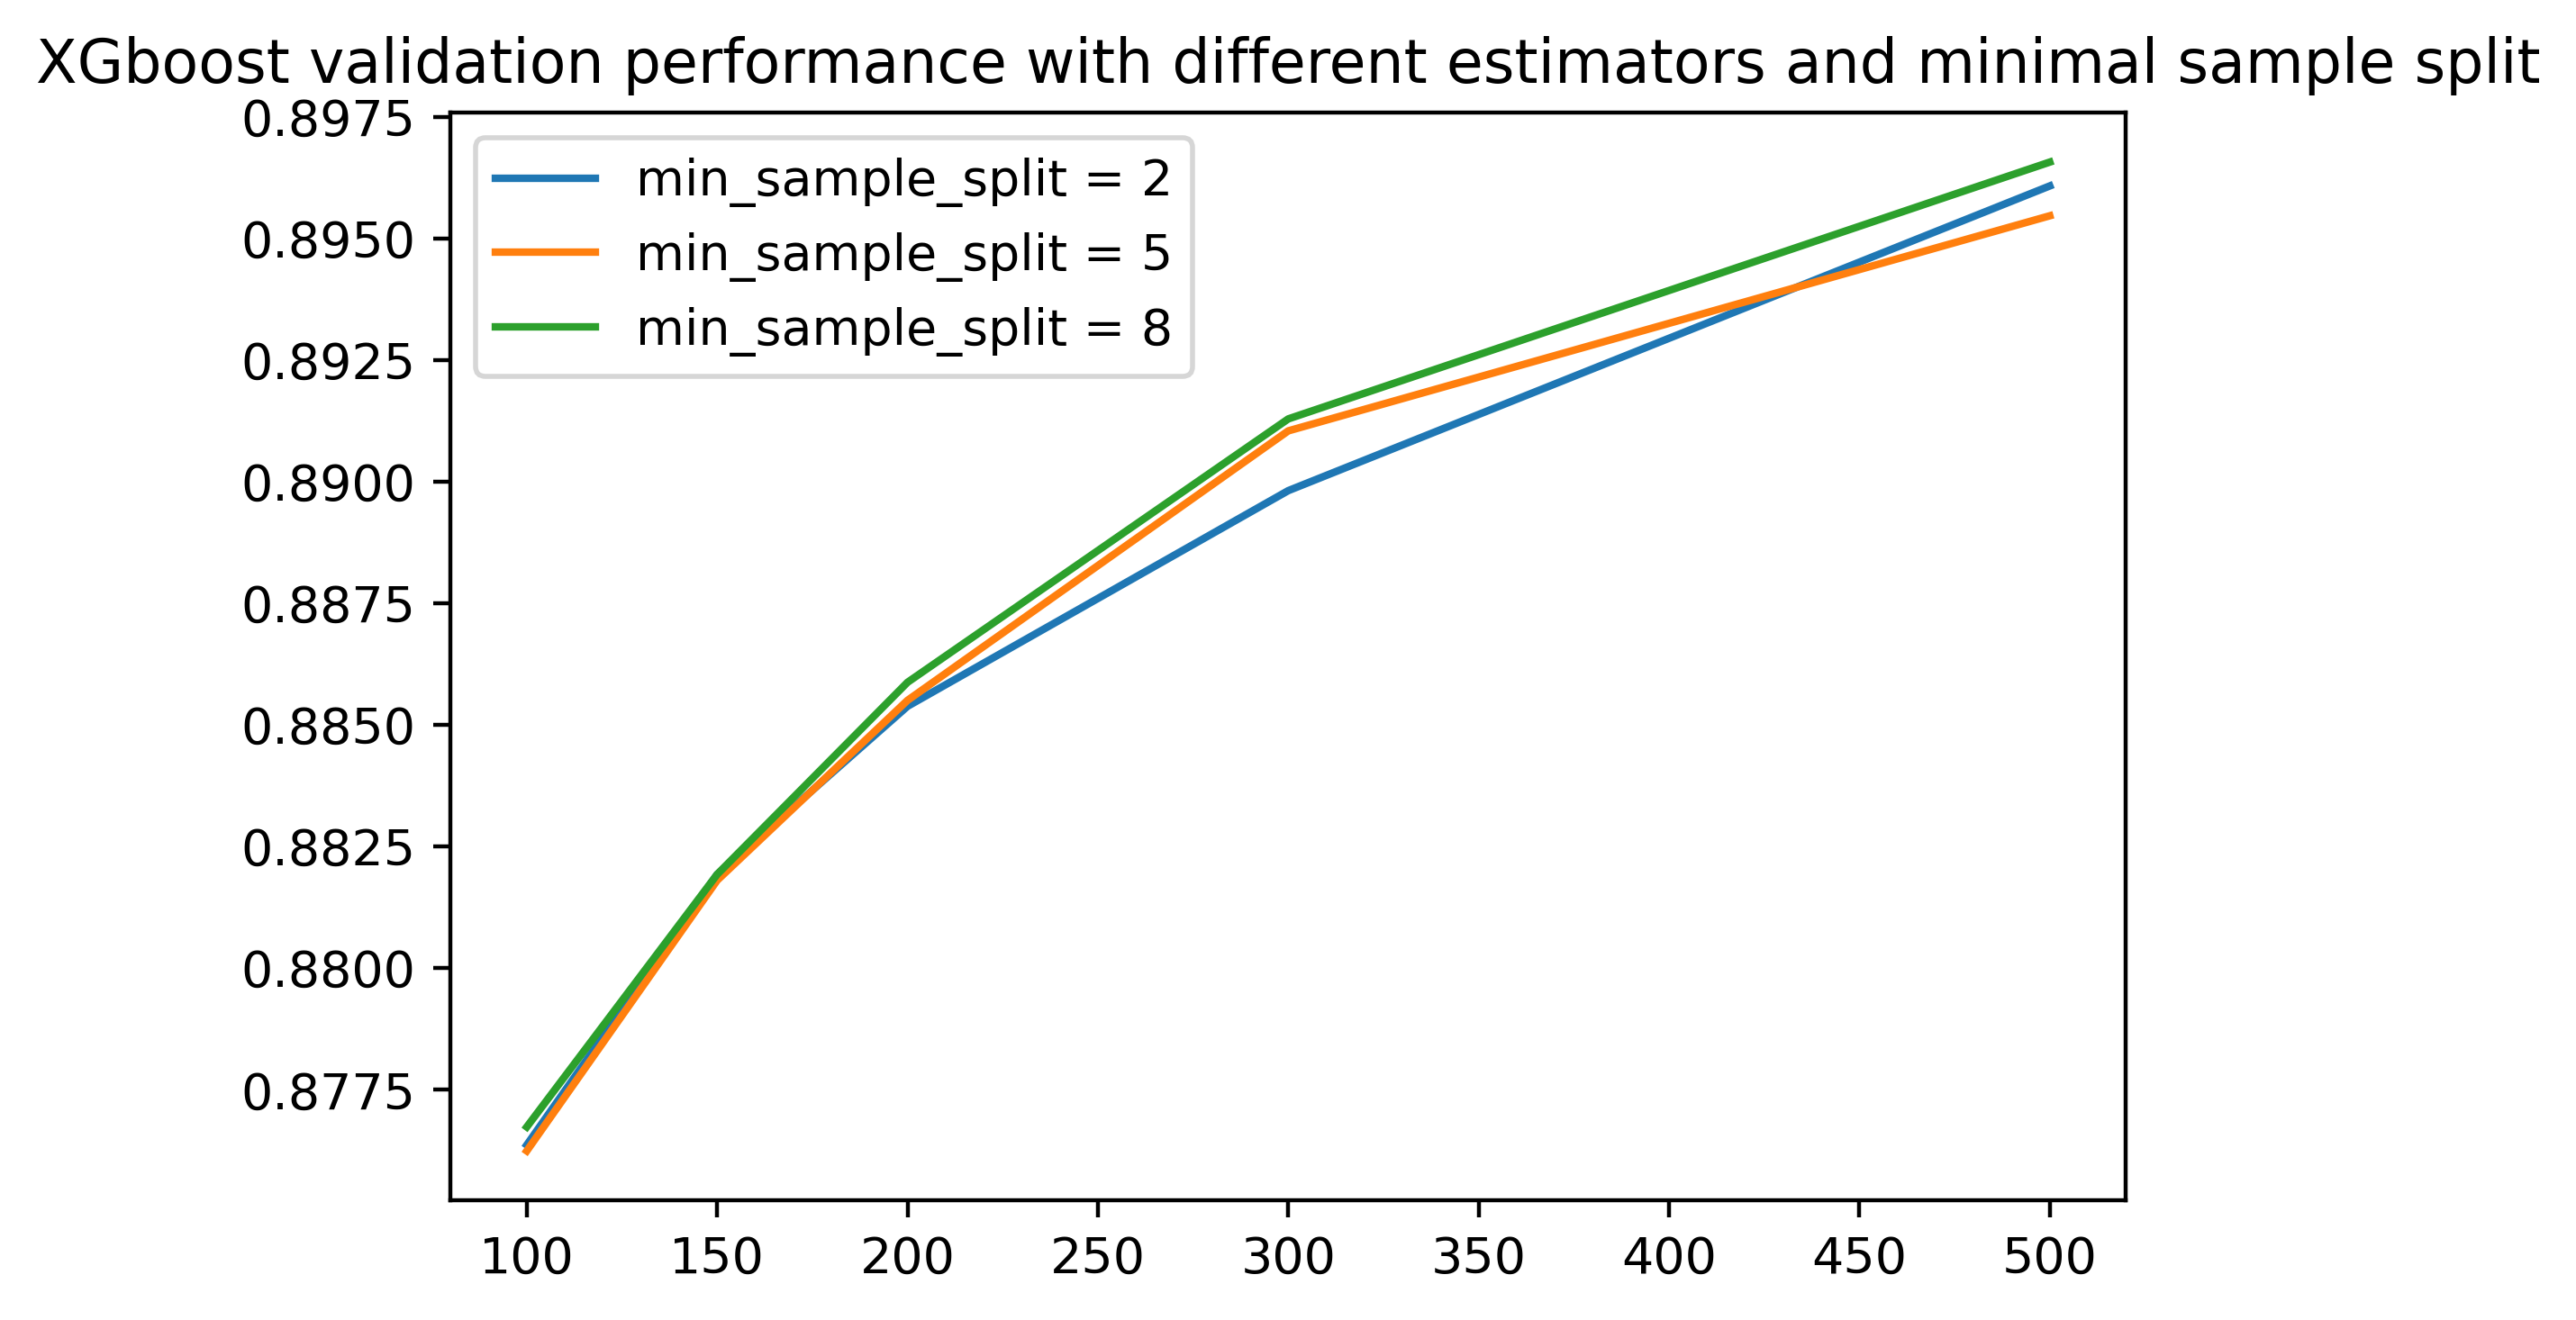

In [ ]:
train_data_3 = pd.read_csv("Train_3_gram_prep.csv")
validate_data_3 = pd.read_csv("Validate_3_gram_prep.csv")
X_train_3 = train_data_3.iloc[::,:-1].values
y_train_3 = train_data_3["Label"].values
X_validate_3 = validate_data_3.iloc[::,:-1].values
y_validate_3 = validate_data_3["Label"].values
#parametr tuning
Xgboost_parameter(X_train_3, y_train_3, X_validate_3, y_validate_3)

Precision: 0.9032958946981784
Recall: 0.89470435748673
Accuracy: 0.89470435748673
F1-score: 0.8952162103868901


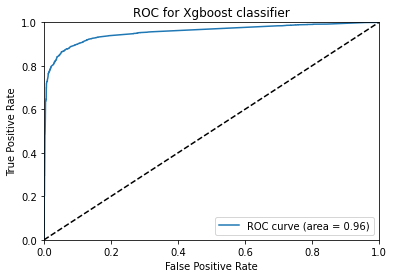

In [ ]:
best_GBC = GradientBoostingClassifier(n_estimators =500 , min_samples_split =8 )
best_validate_performance(best_GBC,X_train_3, y_train_3, X_validate_3, y_validate_3)

### best performance is achieved at 1-gram feature extraction with, min_sample_split = 5, n_estimator = 500, validation F1-score = 0.89889

### Explain the best model

In [ ]:

best_GBC = GradientBoostingClassifier(n_estimators = 5000, min_samples_split = 5)
best_GBC.fit(X_train_1, y_train_1.ravel())



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[]

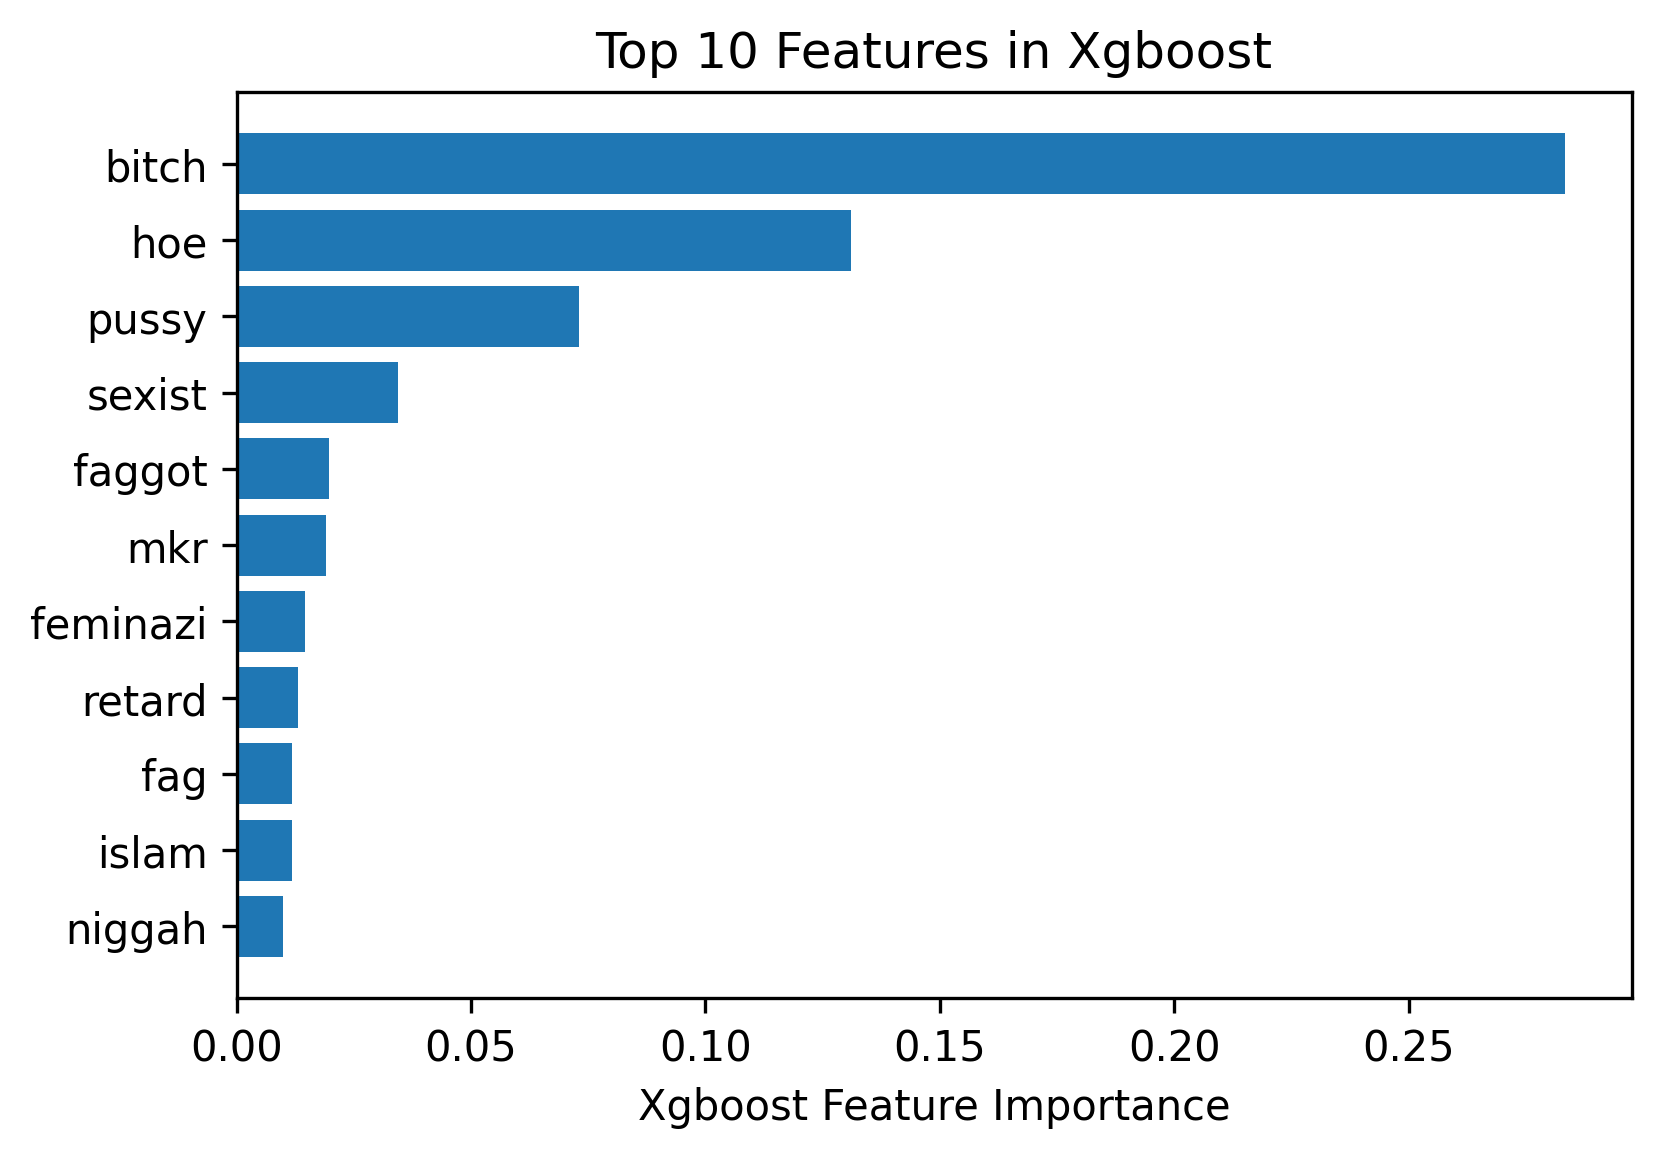

In [ ]:
plt.figure(dpi = 300)
sorted_idx = best_GBC.feature_importances_.argsort()[-11:]
plt.barh(np.array(train_data_1.columns.tolist())[:-1][sorted_idx], best_GBC.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.title('Top 10 Features in Xgboost')
plt.plot()
